# Amex Hackathon

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

You are hired as a consultant to build an efficient model to predict whether a user will click on an ad or not, given the following features:
* Clickstream data/train data for duration: (2nd July 2017 – 7th July 2017)
* Test data for duration: (8th July 2017 – 9th July 2017)
* User features (demographics, user behaviour/activity, buying power etc.)
* Historical transactional data of the previous month with timestamp info (28th May 2017– 1st July 2017). This data contains actions (views/interest registered) taken by the user historically on the product page via an ad or other sources
* Ad features (product category, webpage, campaign for ad etc.)
* Date time features (exact timestamp of the user session)

Train Data

* session_id	Unique ID for a session
* DateTime	Timestamp
* user_id	Unique ID for user
* product	Product ID
* campaign_id	Unique ID for ad campaign
* webpage_id	Webpage ID at which the ad is displayed
* product_category_1	Product category 1 (Ordered)
* product_category_2	Product category 2
* user_group_id	Customer segmentation ID
* gender	Gender of the user
* age_level	Age level of the user
* user_depth	Interaction level of user with the web platform (1 - low, 2 - medium, 3 - High)
* city_development_index	Scaled development index of the residence city
* var_1	Anonymised session feature
* is_click	0 - no click, 1 - click  

Historical User logs

* Variable	Definition
* DateTime	Timestamp
* user_id	Unique ID for the user
* product	Product ID
* action	view/interest (view - viewed the product page, interest - registered interest for the product)

In [2]:
#Reading the train csv data
train= pd.read_csv('train_amex/train.csv')
train.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [3]:
#Reading the historical csv data
history= pd.read_csv('train_amex/historical_user_logs.csv')
history.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [4]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24287534 entries, 0 to 24287533
Data columns (total 4 columns):
DateTime    object
user_id     int64
product     object
action      object
dtypes: int64(1), object(3)
memory usage: 741.2+ MB


In [5]:
history['user_id'].nunique()

171309

In [6]:
history[history['user_id'] == 704]

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
8088465,2017-06-22 18:20,704,C,view
8088995,2017-06-22 18:21,704,C,view
11609282,2017-06-25 07:24,704,C,view
11611459,2017-06-25 07:26,704,C,view
13540466,2017-06-26 10:05,704,H,view
13545142,2017-06-26 10:08,704,H,view
14219927,2017-06-26 17:18,704,C,view
14227093,2017-06-26 17:22,704,C,view
15903192,2017-06-27 15:20,704,G,view


In [7]:
train['user_id'].nunique()

150347

In [8]:
train['user_id'].isin(history['user_id']).all()

False

In [9]:
train[train['user_id'] == 704]

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
124108,9204,2017-07-03 14:06,704,I,105960,11085,2,270915.0,3.0,Male,3.0,3.0,4.0,0,0
145618,107956,2017-07-03 19:20,704,C,405490,60305,3,NaN,3.0,Male,3.0,3.0,4.0,0,0
189651,172634,2017-07-04 13:24,704,C,359520,13787,4,NaN,3.0,Male,3.0,3.0,4.0,0,0
291248,128080,2017-07-05 18:31,704,C,359520,13787,4,NaN,3.0,Male,3.0,3.0,4.0,0,0
339802,107964,2017-07-06 10:53,704,C,405490,60305,3,NaN,3.0,Male,3.0,3.0,4.0,0,1
339804,458499,2017-07-06 10:53,704,C,360936,13787,3,NaN,3.0,Male,3.0,3.0,4.0,0,0


#### Train set users less than History data. and not all users in history are there. There are new users too.

## Let's visualize Historical data 

In [10]:
#We will change the datetime object
history['DateTime']=pd.to_datetime(history['DateTime'])

In [11]:
#Now we shall introduce new columns Hour,Day of Week from timestamp
history['Hour']=history['DateTime'].apply(lambda time : time.hour)
history['DayofWeek'] = history['DateTime'].apply(lambda time : time.dayofweek)

Text(0.5, 1.0, 'Action hourly distribution of viewing')

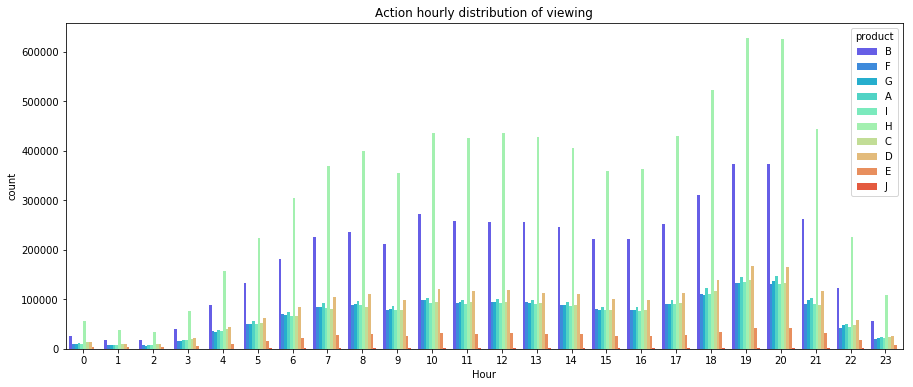

In [12]:
#Hourly distribution of action
plt.figure(figsize=(15,6))
sns.countplot(x='Hour',data=history[history['action']=='view'],hue='product',palette='rainbow')
plt.title('Action hourly distribution of viewing')

#### Inference:
* 6-8 pm are the most viewing peak time
* product H is the most viewed one followed by product B.
* 10pm -5 am is least period of action
* There is slight dip in between 2-4 pm

Text(0.5, 1.0, 'Action hourly distribution of interest')

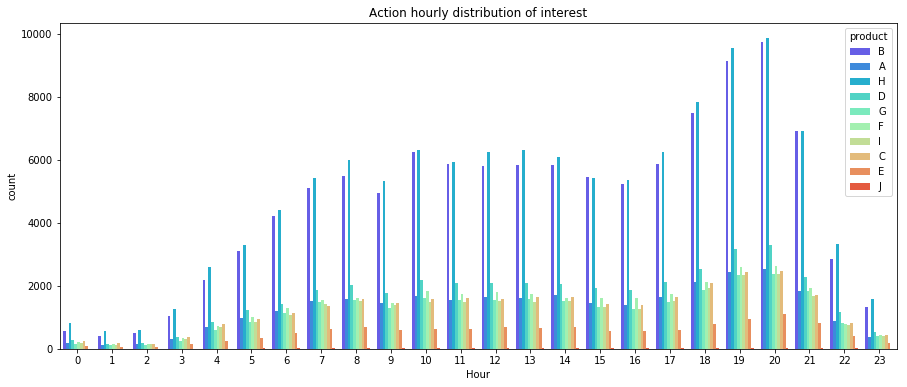

In [13]:
#Hourly distribution of action
plt.figure(figsize=(15,6))
sns.countplot(x='Hour',data=history[history['action']=='interest'],hue='product',palette='rainbow')
plt.title('Action hourly distribution of interest')

#### Inference:
* Follows the same trend as viewing. 6-8 pm are the most viewing peak time. This shows 'view' and 'interest' are highly related. 
* product B and H shows nearly same amount of interest 
* 10pm -5 am is least period of action
* There is slight dip in between 2-4 pm

Text(0.5, 1.0, 'Action daily distribution of viewing')

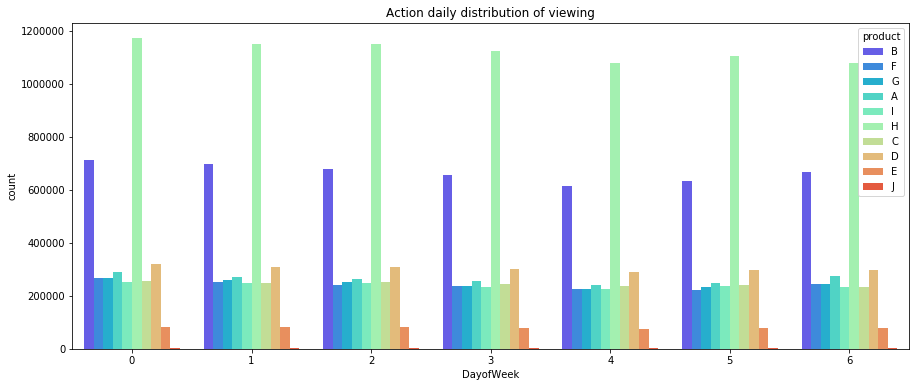

In [14]:
#Daily distribution of action
plt.figure(figsize=(15,6))
sns.countplot(x='DayofWeek',data=history[history['action']=='view'],hue='product',palette='rainbow')
plt.title('Action daily distribution of viewing')

#### Inference
* Nearly same distribution of viewing everyday
* Product H are most viewed, followed by product B.

Text(0.5, 1.0, 'Action daily distribution of interest')

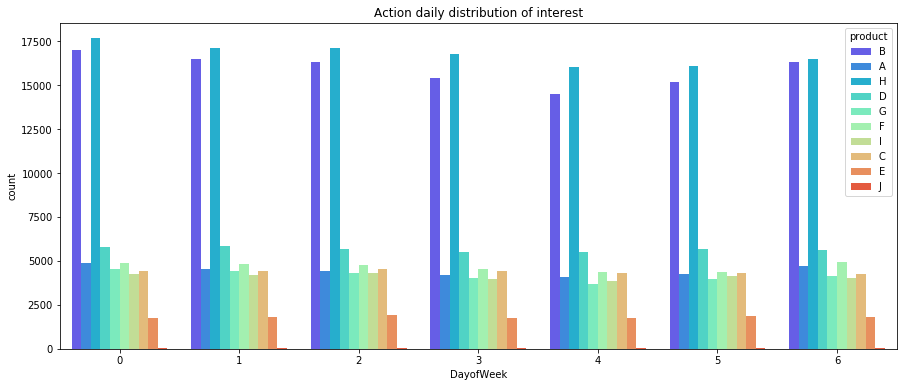

In [15]:
#Daily distribution of action
plt.figure(figsize=(15,6))
sns.countplot(x='DayofWeek',data=history[history['action']=='interest'],hue='product',palette='rainbow')
plt.title('Action daily distribution of interest')

#### Inference
* Nearly same distribution of viewing everyday
* Product B and H shows nearly same amount of interest

#### Insights from Historical data: 
* Hourly distribution describes the trends very neatly compared to  daily distribution
* product B and H are most important ones.
* 6-8pm are the peak hours.
* there are new users in train data

## Data Visualization of Training data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
session_id                463291 non-null int64
DateTime                  463291 non-null object
user_id                   463291 non-null int64
product                   463291 non-null object
campaign_id               463291 non-null int64
webpage_id                463291 non-null int64
product_category_1        463291 non-null int64
product_category_2        97437 non-null float64
user_group_id             445048 non-null float64
gender                    445048 non-null object
age_level                 445048 non-null float64
user_depth                445048 non-null float64
city_development_index    338162 non-null float64
var_1                     463291 non-null int64
is_click                  463291 non-null int64
dtypes: float64(5), int64(7), object(3)
memory usage: 53.0+ MB


In [4]:
train.isnull().sum(axis = 0)

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [5]:
#Let's take out the hours minutes day out of date time and drop the date time column
train['DateTime']=pd.to_datetime(train['DateTime'])
train['Hour']=train['DateTime'].apply(lambda time : time.hour)
train['Minute']=train['DateTime'].apply(lambda time : time.minute)
train['DayofWeek'] = train['DateTime'].apply(lambda time : time.dayofweek)
train.drop(['DateTime'],axis=1,inplace=True)

In [6]:
train.head()

,session_id,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,Hour,Minute,DayofWeek
0,140690,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,0,0,6
1,333291,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,0,6
2,129781,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,0,6
3,464848,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,0,0,6
4,90569,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,0,1,6


### Let's view Clicked ad's distributions

Text(0.5, 1.0, ' gender distribution of products ad clicked')

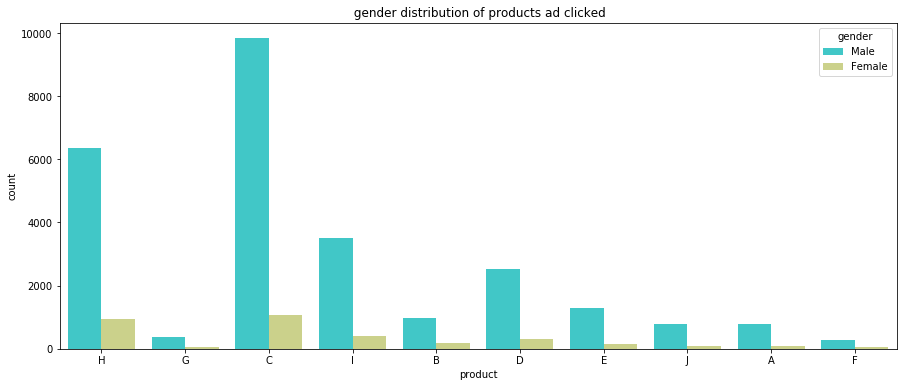

In [7]:
# Gender distribution
plt.figure(figsize=(15,6))
sns.countplot(x='product',data=train[train['is_click']==1],hue='gender',palette='rainbow')
plt.title(' gender distribution of products ad clicked')

Text(0.5, 1.0, 'Minute distribution of products ad clicked')

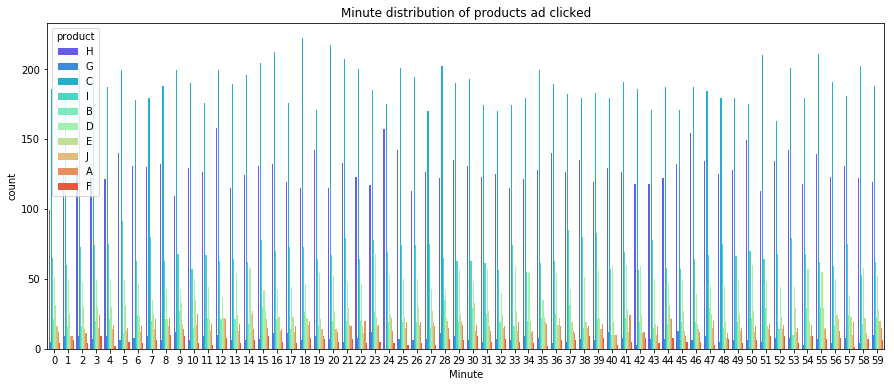

In [8]:
#Minute distribution
plt.figure(figsize=(15,6))
sns.countplot(x='Minute',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Minute distribution of products ad clicked')

Text(0.5, 1.0, 'Hourly distribution of products ad clicked')

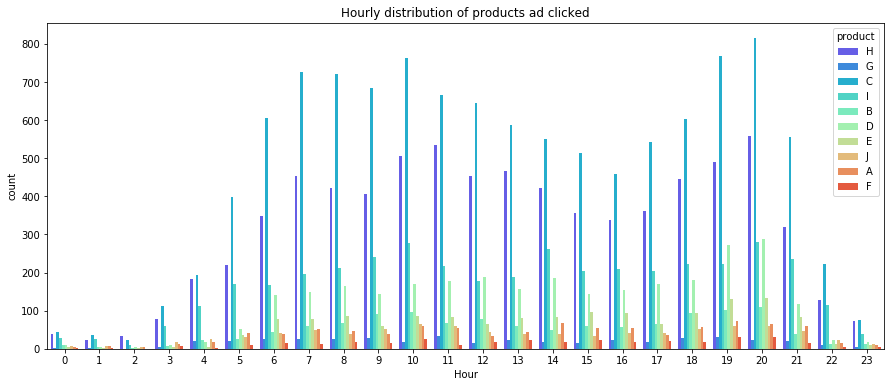

In [16]:
#Hourly distribution
plt.figure(figsize=(15,6))
sns.countplot(x='Hour',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Hourly distribution of products ad clicked')

Text(0.5, 1.0, 'Action daily distribution of viewing')

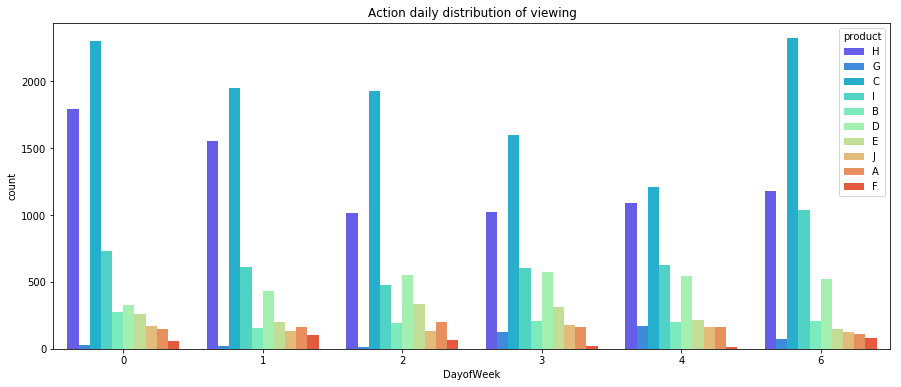

In [17]:
#Daily distribution
plt.figure(figsize=(15,6))
sns.countplot(x='DayofWeek',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Action daily distribution of viewing')

#### Inference
* Males outnumber females for every product ads clicked 
* The Ads most clicked were of product C, followed by product H
* The peak hours are 7-12am and then there is a dip and then again 7-8pm
* Why in previous month customers showed less interest in product C comparatively, but this 5days they clicked on ads of product C the most? Is it due to new custmers?

In [18]:
len(set(train['user_id']).intersection(set(history['user_id'])))

145510

#### Only 145510 out of 171309 in previous month are present this month (84.9%).
#### Rest 4837 customers are new this month (3.2%)
#### It would be wrong to say that only these new customers drove the rise in ad clicked for product C. But it might be nearly correct to say that 15% less customers showed a dip in interest for product H, but then why so much dip for product B? It seems that customers for product B have newly grown their interest for product C this new month.

Text(0.5, 1.0, 'Campaign distribution of products ad clicked')

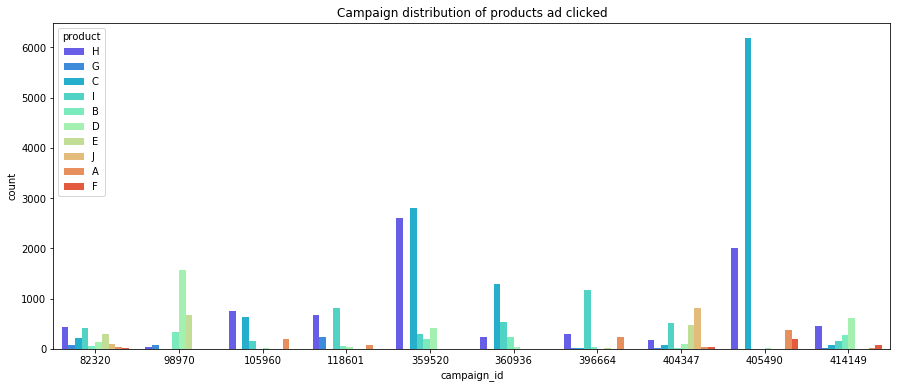

In [19]:
#Campaign_id distribution
plt.figure(figsize=(15,6))
sns.countplot(x='campaign_id',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Campaign distribution of products ad clicked')

### Inference
* For campaign id 405490 we observe a very distinctive amount of ads clicked for product C.
* For campaign id 359520 we observe nearly same amount of ads clicked for product C ad H.

Text(0.5, 1.0, 'Webpage Id distribution of products ad clicked')

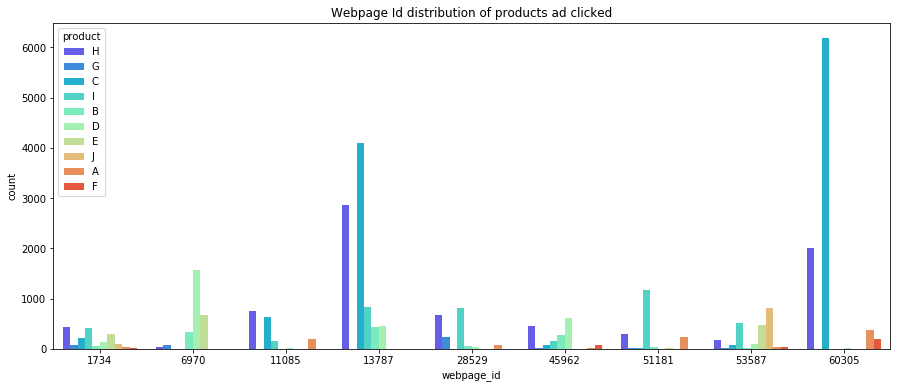

In [20]:
#Webpage Id distribution
plt.figure(figsize=(15,6))
sns.countplot(x='webpage_id',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Webpage Id distribution of products ad clicked')

### Inference
* For webpage id 60305 we observe a very distinctive amount of ads clicked for product C.
* For webpage id 13787 we observe nearly same amount of ads clicked for product C ad H.
* It's clear that webpage id and campaign id distribution are simalar, this concludes that nearly every webpage id has distinctive campaign id, except for webpage id 13787 which has two campaign ids.

Text(0.5, 1.0, 'Product Category 1 1distribution of products ad clicked')

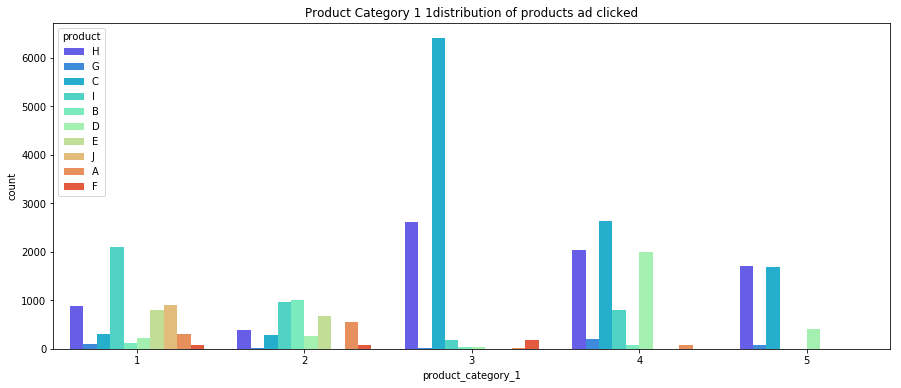

In [22]:
#Product Category 1 distribution
plt.figure(figsize=(15,6))
sns.countplot(x='product_category_1',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Product Category 1 1distribution of products ad clicked')

#### Inference
* For product category 3 we see a very distinctive amount ads clicked for product C

Text(0.5, 1.0, 'Product Category 2 1distribution of products ad clicked')

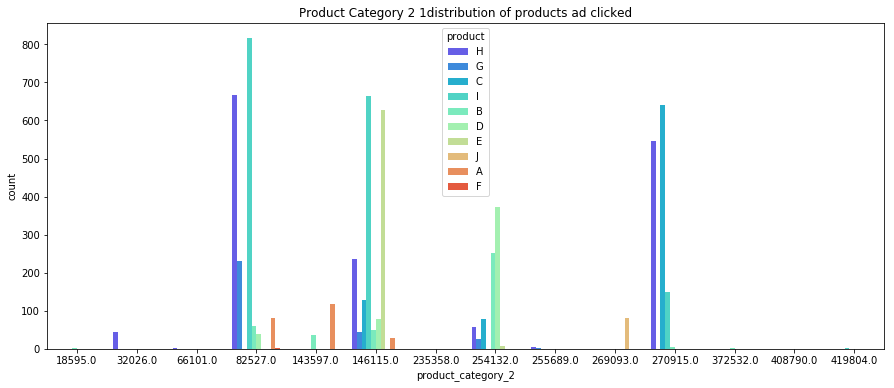

In [23]:
#Product Category 2 distribution
plt.figure(figsize=(15,6))
sns.countplot(x='product_category_2',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title('Product Category 2 1distribution of products ad clicked')

Text(0.5, 1.0, ' User group id distribution of products ad clicked')

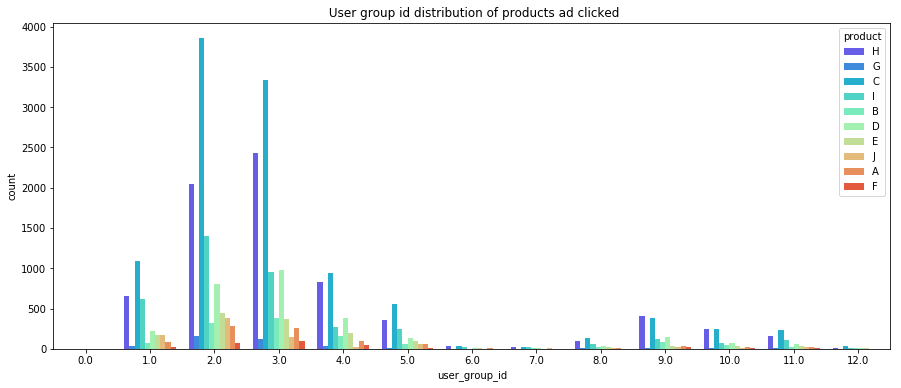

In [24]:
# User Group Id distribution
plt.figure(figsize=(15,6))
sns.countplot(x='user_group_id',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title(' User group id distribution of products ad clicked')

#### Inference

* User Group Id 2 and 3 are the most active ones on ad clicks.

Text(0.5, 1.0, ' Age level distribution of products ad clicked')

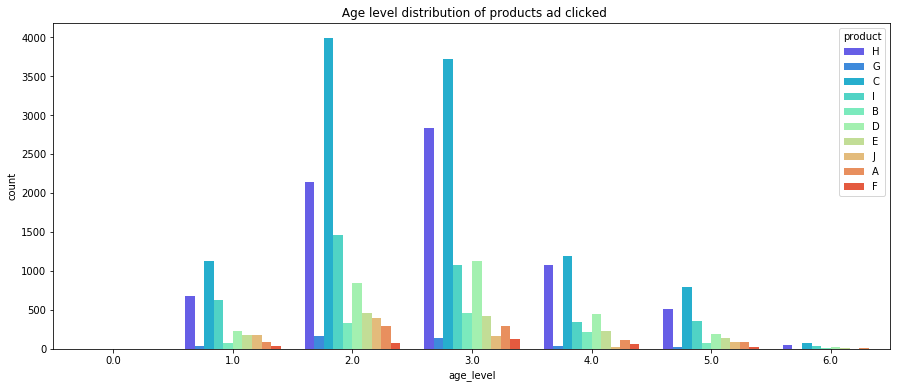

In [25]:
# Age level distribution
plt.figure(figsize=(15,6))
sns.countplot(x='age_level',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title(' Age level distribution of products ad clicked')

#### Inference
* Age level 2 and 3 are the most active ones on ad clicks.
* It's clear that age_level and  user group id distribution are simalar, this concludes that nearly every age level has two distinctive user geoup ids.

Text(0.5, 1.0, ' User depth distribution of products ad clicked')

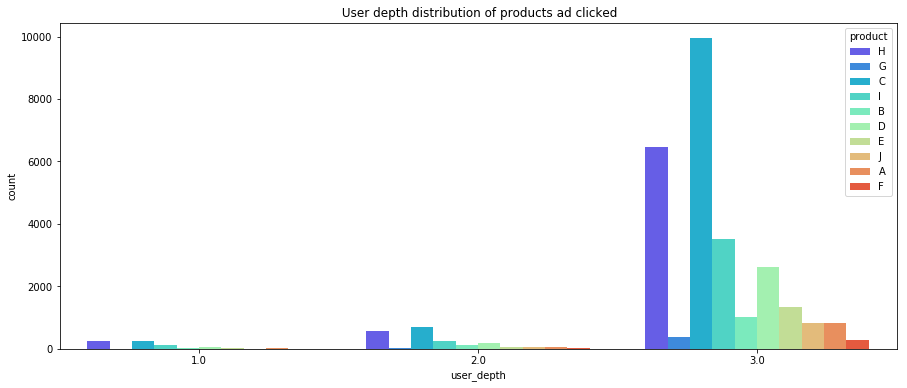

In [26]:
# User depth distribution
plt.figure(figsize=(15,6))
sns.countplot(x='user_depth',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title(' User depth distribution of products ad clicked')

#### Inference
* We see that High interaction level ones are the ones who are clicking the ads most.

Text(0.5, 1.0, ' City development index distribution of products ad clicked')

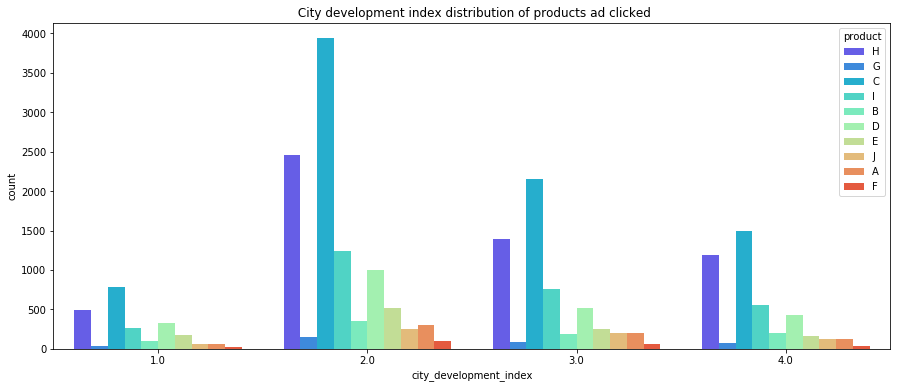

In [27]:
# City Development index distribution
plt.figure(figsize=(15,6))
sns.countplot(x='city_development_index',data=train[train['is_click']==1],hue='product',palette='rainbow')
plt.title(' City development index distribution of products ad clicked')

#### Inference
* We see that Every city has the same distribution of product ads clicked. Index 2 is the most active one.

## Data Preprocessing of Training Data

In [9]:
#Data entering preprocessing phase
train.head()

,session_id,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,Hour,Minute,DayofWeek
0,140690,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,0,0,6
1,333291,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,0,6
2,129781,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,0,0,6
3,464848,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,0,0,6
4,90569,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,0,1,6


In [11]:
# Filling the missing values 
#Gender Males are extremely more
#User depth 3.0 is extremely more

train['gender'].fillna(train['gender'].mode().iloc[0], inplace =True)
#train['gender'].fillna('Third', inplace =True)
#train['gender'].fillna(np.random.choice(['Male','Female']), inplace =True)

train['user_depth'].fillna(train['user_depth'].mode().iloc[0], inplace =True)
#train['user_depth'].fillna(train['user_depth'].mean(), inplace =True)
#train['user_depth'].fillna(np.random.choice([1.,2.,3.]), inplace =True)

#Age level and User group Id, 2 and 3 are most frequent so we fill them randomly
train['age_level'].fillna(np.random.choice([2.,3.]), inplace =True)
#train['age_level'].fillna(train['age_level'].mean(), inplace =True)
#train['age_level'].fillna(np.random.choice([0.,1.,2.,3.,4.,5.,6.]), inplace =True)

train['user_group_id'].fillna(np.random.choice([2.,3.]), inplace =True)
#train['user_group_id'].fillna(train['user_group_id'].mean(), inplace =True)
#train['user_group_id'].fillna(np.random.choice([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.]), inplace =True)

#city devel index has 2, 3 and 4 more or less. so we fill it randomly
#train['city_development_index'].fillna(np.random.choice(2.0,5.0), inplace =True)
#train['city_development_index'].fillna(train['city_development_index'].mode(), inplace =True)
train['city_development_index'].fillna(np.random.choice([1.,2.,3.,4.]), inplace =True)

#For product category 2 we fill with new value as it so much
#train['product_category_2'].fillna(train['product_category_2'].mean(), inplace =True)
train['product_category_2'].fillna(np.random.choice([270915., 146115., 254132., 372532., 450184.,  18595.,255689., 408790., 202351., 408831.,  32026., 235358., 143597.,234846., 301147.,  99226., 419804., 269093., 270147., 181650.,66101., 419304., 300711., 447834.,  82527., 327439., 381435.,168114., 247789]), inplace =True)

In [12]:
#Separate the feature columns from the labels

#Feature Columns
X= train.drop('is_click',axis=1)
#Labels
y= train['is_click']

In [13]:
#If data has categorical columns, then you need to give them dummy variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Encoding categorical columns
ct = ColumnTransformer([('oh_enc',OneHotEncoder(sparse=False),[2,8])], remainder = 'passthrough')
X = ct.fit_transform(X)

#Deleting the repeated dummy variable columns
X = np.delete(X, [0,10], axis = 1)

In [14]:
X[0]

array([0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.40690e+05, 8.58557e+05, 3.59520e+05, 1.37870e+04, 4.00000e+00,
       6.61010e+04, 1.00000e+01, 4.00000e+00, 3.00000e+00, 3.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00])

### Similarily Preparing the Test Dataset

In [15]:
#Reading the test csv data
test= pd.read_csv('test.csv')
test.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [16]:
test['DateTime']=pd.to_datetime(test['DateTime'])
test['Hour']=test['DateTime'].apply(lambda time : time.hour)
test['Minute']=test['DateTime'].apply(lambda time : time.minute)
test['DayofWeek'] = test['DateTime'].apply(lambda time : time.dayofweek)
test.drop(['DateTime'],axis=1,inplace=True)

In [17]:
test['gender'].fillna(test['gender'].mode().iloc[0], inplace =True)
#test['gender'].fillna('Third', inplace =True)
#test['gender'].fillna(np.random.choice(['Male','Female']), inplace =True)

test['user_depth'].fillna(test['user_depth'].mode().iloc[0], inplace =True)
#test['user_depth'].fillna(test['user_depth'].mean(), inplace =True)
#test['user_depth'].fillna(np.random.choice([1.,2.,3.]), inplace =True)

test['age_level'].fillna(np.random.choice([2.0,3.0]), inplace =True)
#test['age_level'].fillna(test['age_level'].mean(), inplace =True)
#test['age_level'].fillna(np.random.choice([0.,1.,2.,3.,4.,5.,6.]), inplace =True)

test['user_group_id'].fillna(np.random.choice([2.0,3.0]), inplace =True)
#test['user_group_id'].fillna(test['user_group_id'].mean(), inplace =True)
#test['user_group_id'].fillna(np.random.choice([0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,12.]), inplace =True)

#test['city_development_index'].fillna(np.random.choice(2.0,3.0,4.0), inplace =True)
#test['city_development_index'].fillna(test['city_development_index'].mean(), inplace =True)
test['city_development_index'].fillna(np.random.choice([1.,2.,3.,4.]), inplace =True)

#test['product_category_2'].fillna(test['product_category_2'].mean(), inplace =True)
test['product_category_2'].fillna(np.random.choice([82527., 146115., 270915., 254132., 419804., 269093.,168114., 408790., 235358.,  18595., 234846., 447834.,  32026.,143597., 255689., 450184., 344959., 327439., 269340.]), inplace =True)

X_test = ct.transform(test)
X_test = np.delete(X_test, [0,10], axis = 1)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X.astype(float))
X_test = sc.transform(X_test.astype(float))

### Now let's build the Neural Network

In [19]:
# Fitting the ANN to the Training set
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
classifier.add(Dense(units = 12, kernel_initializer='uniform', activation='relu', input_dim = 24))
#classifier.add(Dropout(0.2))
classifier.add(Dense(units = 24, kernel_initializer='uniform', activation='relu'))
#classifier.add(Dropout(0.1))
classifier.add(Dense(units = 12, kernel_initializer='uniform', activation='relu'))
#classifier.add(Dropout(0.2))
classifier.add(Dense(units = 24, kernel_initializer='uniform', activation='relu'))
#classifier.add(Dropout(0.1))
classifier.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
classifier.fit(X_train, y, batch_size = 100, epochs = 20)

Using TensorFlow backend.


Epoch 1/20
463291/463291 [==============================] - 12s 25us/step - loss: 0.2533 - acc: 0.9323
Epoch 2/20
463291/463291 [==============================] - 10s 22us/step - loss: 0.2460 - acc: 0.9324
Epoch 3/20
463291/463291 [==============================] - 10s 21us/step - loss: 0.2457 - acc: 0.9324
Epoch 4/20
463291/463291 [==============================] - 10s 21us/step - loss: 0.2455 - acc: 0.9324
Epoch 5/20
463291/463291 [==============================] - 10s 22us/step - loss: 0.2454 - acc: 0.9324
Epoch 6/20
463291/463291 [==============================] - 10s 21us/step - loss: 0.2452 - acc: 0.9324
Epoch 7/20
463291/463291 [==============================] - 9s 20us/step - loss: 0.2450 - acc: 0.9324
Epoch 8/20
463291/463291 [==============================] - 9s 19us/step - loss: 0.2448 - acc: 0.9324
Epoch 9/20
463291/463291 [==============================] - 9s 20us/step - loss: 0.2446 - acc: 0.9324
Epoch 10/20
463291/463291 [==============================] - 9s 20us/step - 

In [20]:
#Check roc score for training set
from sklearn.metrics import roc_auc_score
check = classifier.predict(X_train)
for i in np.linspace(0,0.1,80):
    print(i," --> ", roc_auc_score(y,(check>i)))

0.0  -->  0.5
0.0012658227848101266  -->  0.5
0.002531645569620253  -->  0.5
0.00379746835443038  -->  0.5
0.005063291139240506  -->  0.5
0.006329113924050633  -->  0.5
0.00759493670886076  -->  0.5
0.008860759493670886  -->  0.5
0.010126582278481013  -->  0.5
0.01139240506329114  -->  0.5
0.012658227848101266  -->  0.5
0.013924050632911392  -->  0.5
0.01518987341772152  -->  0.5
0.016455696202531647  -->  0.5
0.017721518987341773  -->  0.5000046300583387
0.0189873417721519  -->  0.5001738737566707
0.020253164556962026  -->  0.5002410096025823
0.021518987341772152  -->  0.5002632489486593
0.02278481012658228  -->  0.500361466449645
0.024050632911392405  -->  0.500535984004763
0.02531645569620253  -->  0.5006815431170626
0.026582278481012658  -->  0.5012327254719375
0.027848101265822784  -->  0.5019636239084608
0.02911392405063291  -->  0.5030652283331055
0.03037974683544304  -->  0.5046436876102373
0.03164556962025317  -->  0.5060160887130941
0.03291139240506329  -->  0.507659444137223

In [21]:
# Predicting the Test set results
y_pred_nn = classifier.predict(X_test)

In [22]:
# We shall consider the score
for i in range(len(y_pred_nn)):
    if y_pred_nn[i] > 0.07:
        y_pred_nn[i] = 1
    else:
        y_pred_nn[i] = 0

In [23]:
#Generating Submission file.
id=test['session_id']
submit=pd.DataFrame({'session_id':id, 'is_click':y_pred_nn.ravel()})
submit.to_csv('Submission.csv',index=False)